# 1. 데이터 import, 가속도 계산

In [2]:
import csv
import numpy as np

filename = 'merged_file_4d.csv'
data = np.loadtxt(filename, delimiter=',', skiprows=1)
ids = np.unique(data[:, 1])  # 물체 id 목록

features = []
labels = []

# 물체별 가속도 계산
for id in ids:
    idx = np.where(data[:, 1] == id)[0]
    t = data[idx, 0]
    x = data[idx, 2]
    y = data[idx, 3]

    if id < 100:
        dt = t[1] - t[0]
        vx = np.diff(x) / dt  # x 방향 속도
        vy = np.diff(y) / dt  # y 방향 속도
        ax = np.diff(vx) / dt  # x 방향 가속도
        ay = np.diff(vy) / dt  # y 방향 가속도
        avg_ax = round(np.mean(ax),2)  # x 방향 평균 가속도
        avg_ay = round(np.mean(ay),2)  # y 방향 평균 가속도

     
        if avg_ax == 0 and avg_ay == 0:
            label = 'l'  # 직선 운동
        elif avg_ax == 0 and avg_ay < 0:
            label = 'p'  # 포물선 운동
        else:
            label = 'b'  # 바운싱 운동

        features.append([avg_ax, avg_ay])
        labels.append(label)

    if id >= 100:
        vx = np.diff(x) / np.diff(t)  # x 방향 가속도
        vy = np.diff(y) / np.diff(t)  # y 방향 가속도
        avg_ax = round(np.mean(vx),2)  # x 방향 평균 가속도
        avg_ay = round(np.mean(vy),2)  # y 방향 평균 가속도

      
        if avg_ax == 0 and avg_ay == 0:
            label = 'l'  # 직선 운동
        elif avg_ax == 0 and avg_ay < 0:
            label = 'p'  # 포물선 운동
        else:
            label = 'b'  # 바운싱 운동

    
        features.append([avg_ax, avg_ay])
        labels.append(label)


# 2. 데이터 정규화

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


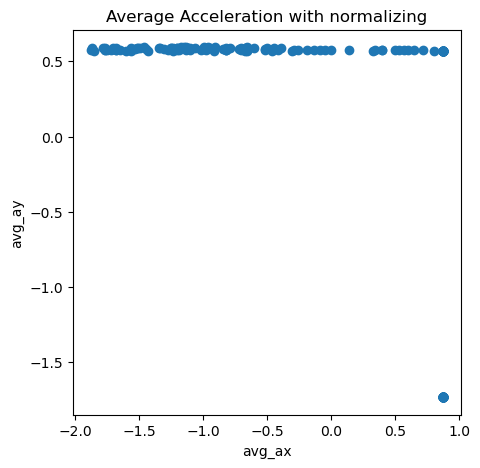

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1])
#plt.scatter(features_scaled[label == cluster, 0], features_scaled[label == cluster, 1], s=100, edgecolor='black')
plt.title('Average Acceleration with normalizing')
plt.xlabel('avg_ax')
plt.ylabel('avg_ay')
plt.show()

# 3. K Means Clustering 

## 최적의 K 값 찾기 (엘보우 방식 Elbow Method): 경사가 완만해지는 지점

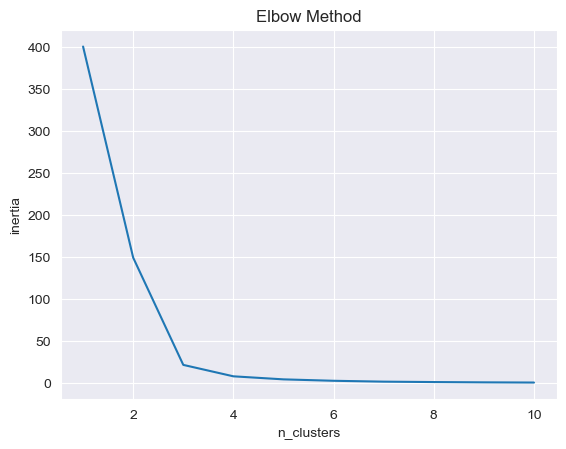

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(features_scaled)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid) 까지의 거리의 제곱의 합
    
plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [63]:
K = 3

kmeans = KMeans(n_clusters=K, random_state=0)
# kmeans.fit(features_scaled)
y_kmeans = kmeans.fit_predict(features_scaled)

In [55]:
y_kmeans #예측 분류값

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [59]:
print(labels) #실제값

['l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

In [64]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 (centroid) 좌표
centers

array([[ 0.87387792, -1.73200941],
       [-1.10850093,  0.58198123],
       [ 0.74879064,  0.57142496]])

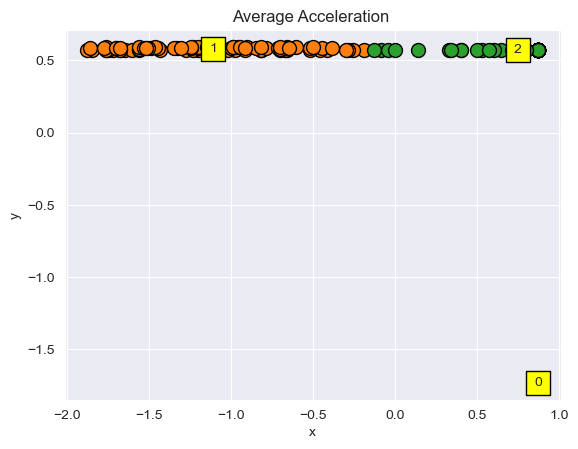

In [65]:
for cluster in range(K):
    plt.scatter(features_scaled[y_kmeans == cluster, 0], features_scaled[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력
    
plt.title('Average Acceleration ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
